In [ ]:
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np

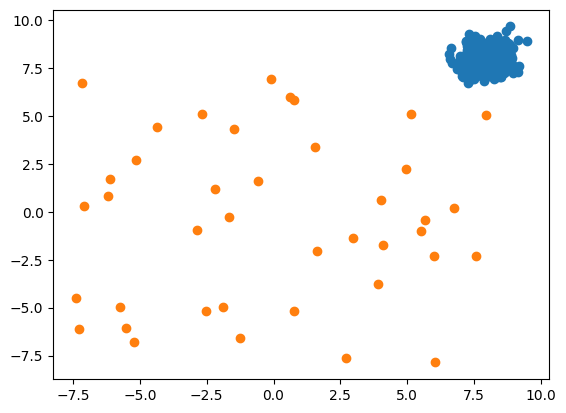

In [ ]:
# Exercise 1

X_train, X_test, y_train, y_test = generate_data(n_train=400, n_test=100, contamination=0.1)

normal_train_samples = [x for x, y in zip(X_train, y_train) if y == 0]
outliers_train = [x for x, y in zip(X_train, y_train) if y == 1]

plt.scatter([point[0] for point in normal_train_samples], [point[1] for point in normal_train_samples])
plt.scatter([point[0] for point in outliers_train], [point[1] for point in outliers_train])

plt.show()

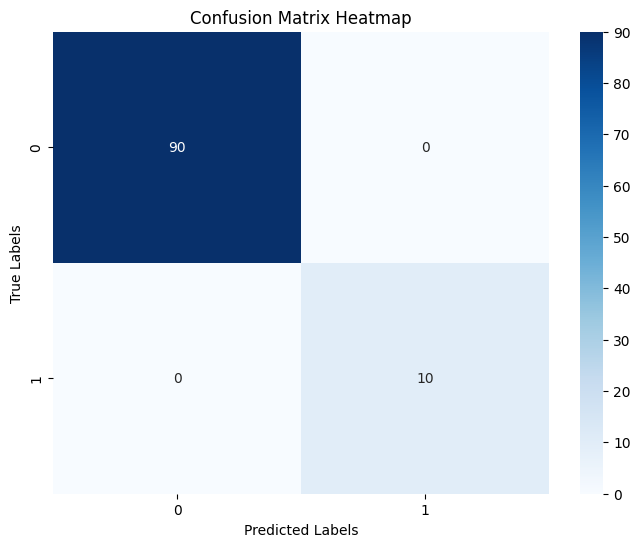

In [ ]:
# Exercise 2

clf = KNN(contamination=0.1)
clf.fit(X_train)

train_predictions = clf.labels_
test_predictions = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, test_predictions)

true_positives = conf_matrix[1][1]
false_positives = conf_matrix[0][1]
true_negatives = conf_matrix[0][0]
false_negatives = conf_matrix[1][0]

TPR = true_positives / (true_positives + false_negatives)
TNR = true_negatives / (true_negatives + false_positives)
BA = (TPR + TNR) / 2

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

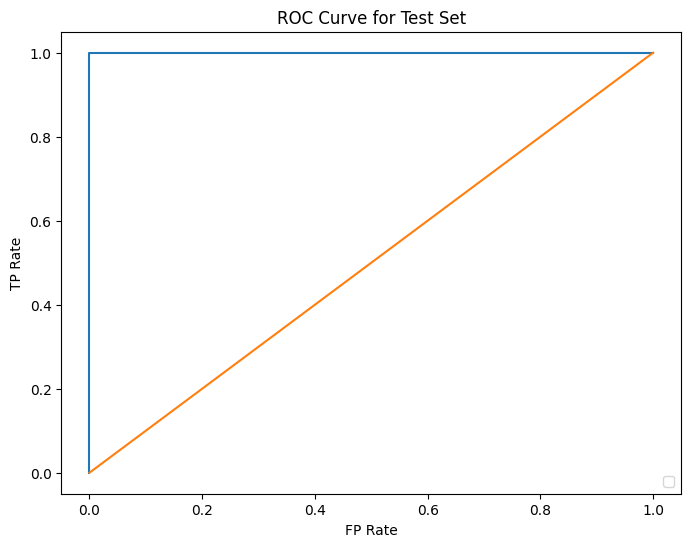

In [ ]:
y_test_scores = clf.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")
plt.show()

Outlier threshold: 0.6746263287030905


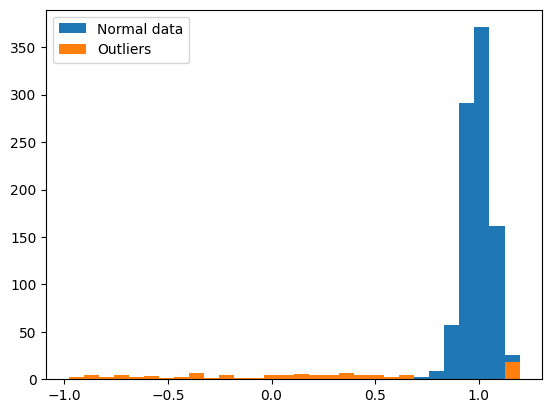

In [ ]:
# Exercise 3

X_train, X_test, y_train, y_test = generate_data(n_train=1000, n_test=0, n_features = 1, contamination=0.1)

z_scores = np.abs((X_train - np.mean(X_train)) / np.std(X_train))
outlier_threshold = np.quantile(z_scores, 0.9)

print('Outlier threshold:', outlier_threshold)

anomalies = X_train[z_scores > outlier_threshold]
normal_data = X_train[z_scores <= outlier_threshold]

plt.hist(X_train, label='Normal data', bins=30)
plt.hist(anomalies, label='Outliers', bins=30)
plt.legend()
plt.show()